# Location identification

**Objective**: 

The main goal of this project predict the location of an user based on the RSSI signals from different beacons.

The RSSI was taken every 100 ms.

## Data Exploration
### 1. Loading libraries

In [1]:
import glob2 as glob
import re
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
pd.option_context("display.max_columns", None)

### 2. Loading data

In [2]:
orig_df = pd.read_csv('/content/drive/MyDrive/Research/IBM Advanced Data Science/finalDataFrame_simulations.csv')
orig_df.head()


,name,rssi,timestamp,experiment,user_at
0,kitchen1,-44.358269,1.0,1,kitchen
1,kitchen1,-53.050031,2.0,1,kitchen
2,kitchen1,-52.284467,3.0,1,kitchen
3,kitchen1,-51.959420,4.0,1,kitchen
4,kitchen1,-57.639364,5.0,1,kitchen


In [7]:
train_df_or = orig_df[orig_df['experiment'].isin([1, 2, 3])]
test_df_or = orig_df[orig_df['experiment'].isin([4, 5])]

#### Loading training file

In [11]:
train_df_or['timestamp2'] = round((train_df_or['timestamp'] * 100)/500)
train_df_or.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,rssi,timestamp,experiment,user_at,timestamp2
0,kitchen1,-44.358269,1.0,1,kitchen,0.0
1,kitchen1,-53.050031,2.0,1,kitchen,0.0
2,kitchen1,-52.284467,3.0,1,kitchen,1.0
3,kitchen1,-51.959420,4.0,1,kitchen,1.0
4,kitchen1,-57.639364,5.0,1,kitchen,1.0
5,kitchen1,-52.188022,6.0,1,kitchen,1.0
6,kitchen1,-57.325460,7.0,1,kitchen,1.0
7,kitchen1,-48.848309,8.0,1,kitchen,2.0
8,kitchen1,-56.808946,9.0,1,kitchen,2.0
9,kitchen1,-42.393604,10.0,1,kitchen,2.0


In [16]:
train_df_or['beacon_at'] = [string[:-1] for string in train_df_or['name']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
train_df_or.groupby('name')['timestamp'].max()

name
kitchen1    400.0
kitchen2    400.0
living1     400.0
living2     400.0
main1       400.0
main2       400.0
study1      400.0
study2      400.0
Name: timestamp, dtype: float64

### 3. Data cleansing

Let's get some statistics of the RSSI from the beacons in each area

In [17]:
train_df_or.groupby(['user_at', 'beacon_at']).agg({'rssi': ['min', 'median', 'mean', 'max', 'std']})

rssi                                           
                          min     median       mean        max       std
user_at beacon_at                                                       
kitchen kitchen    -67.433707 -51.861893 -51.880753 -34.681070  4.870259
        living     -90.683320 -73.891620 -74.039228 -59.850143  4.442824
        main       -99.361780 -84.014433 -84.015392 -67.484395  4.643154
        study      -83.824852 -69.962145 -69.957759 -55.853612  4.315861
living  kitchen    -90.974252 -72.851731 -72.960511 -54.125902  5.131842
        living     -73.014486 -55.221493 -55.204848 -38.999953  5.060947
        main       -91.637423 -73.058531 -73.122876 -54.979424  5.308153
        study      -99.297512 -79.135353 -79.018658 -59.995361  4.639608
main    kitchen    -98.340536 -86.120447 -86.021599 -73.834907  3.345802
        living     -87.787842 -74.054746 -74.048232 -58.632787  4.133067
        main       -71.798285 -49.670204 -49.901940 -24.527452  7.348209
        study      -83.182934 -69.978690 -69.912930 -51.364282  4.071655
study   kitchen   -101.313683 -76.637962 -76.591996 -57.210369  5.278752
        living     -94.874722 -82.637754 -82.631338 -69.795064  3.911647
        main       -90.107065 -76.695548 -76.741072 -62.477916  3.785963
        study      -73.281481 -54.773929 -54.816017 -34.350463  5.507439

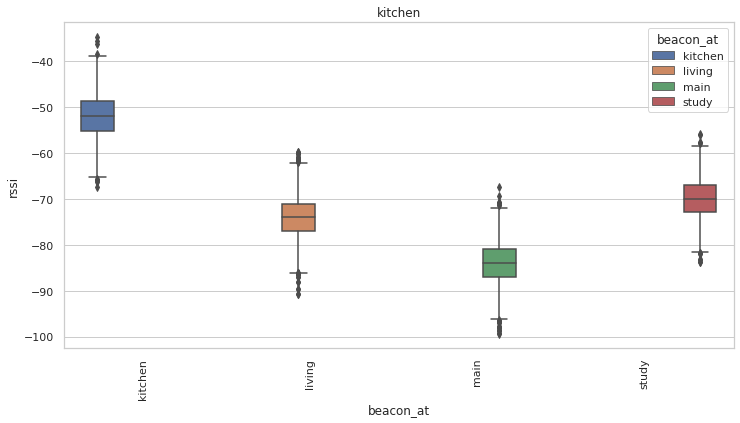

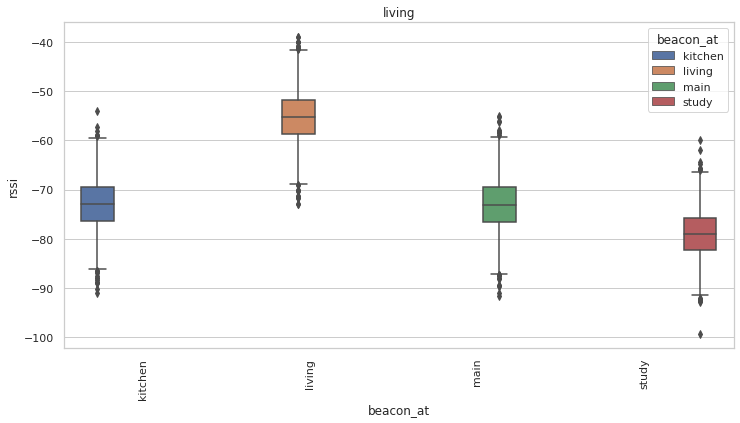

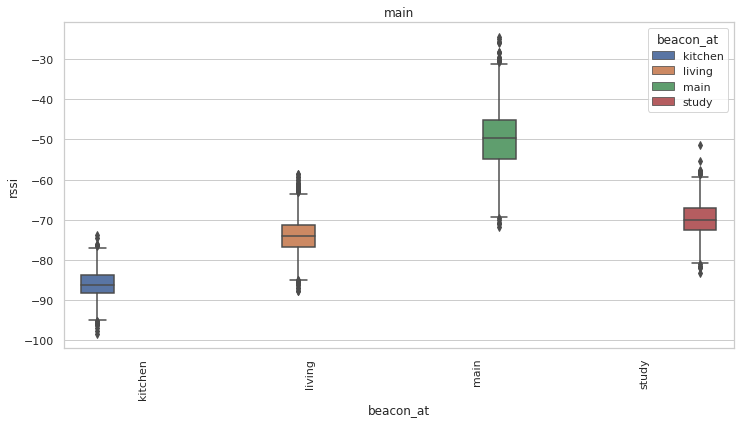

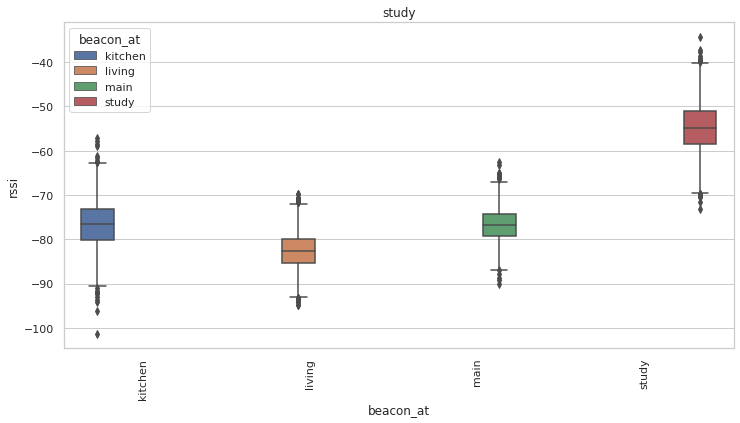

In [18]:
for area in train_df_or['user_at'].unique().tolist():
  plt.figure(figsize=(12, 6))
  sns.set(style='whitegrid')
  tmp = train_df_or[train_df_or['user_at']==area]
  chart = sns.boxplot(x='beacon_at', y='rssi', hue='beacon_at', data=tmp)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
  plt.title(area)
  plt.show()

**Let's plot some experiments:**

Each sample was taken for 40 seconds every 100ms.

In [40]:
def plotSignals(df):
  user_at = df['user_at'].unique()
  plt.figure(figsize=(16, 7))
  sns.lineplot(data=df, x='timestamp2', y='rssi', hue='beacon_at').set(title='user at: ' + user_at)

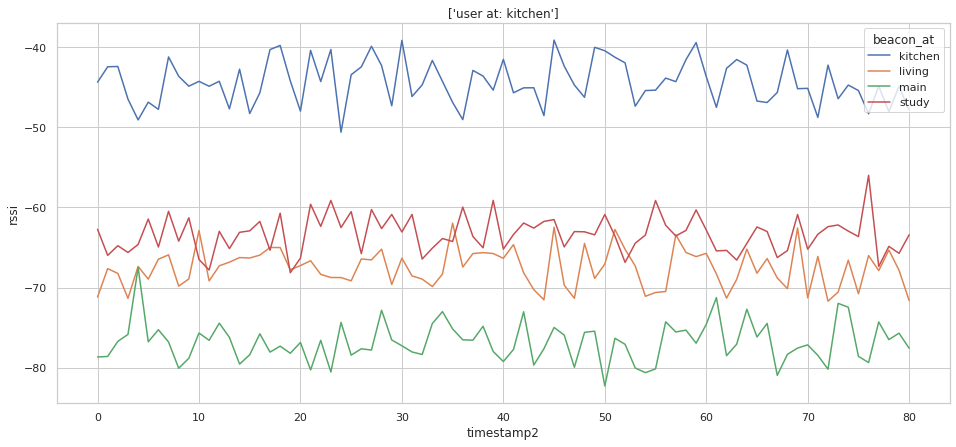

In [42]:
tmp = train_df_or[(train_df_or['experiment']==1) & (train_df_or['user_at']=='kitchen')].groupby(['user_at', 'beacon_at', 'timestamp2'])['rssi'].max().reset_index()
plotSignals(tmp)

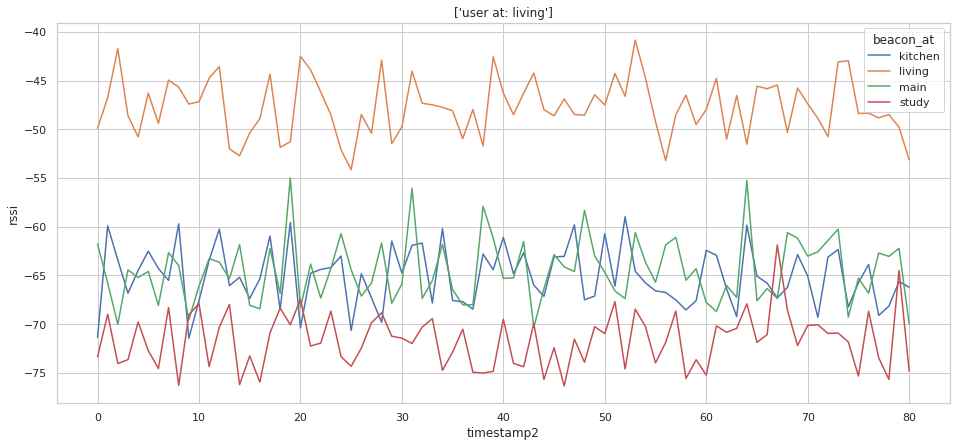

In [43]:
tmp = train_df_or[(train_df_or['experiment']==3) & (train_df_or['user_at']=='living')].groupby(['user_at', 'beacon_at', 'timestamp2'])['rssi'].max().reset_index()
plotSignals(tmp)

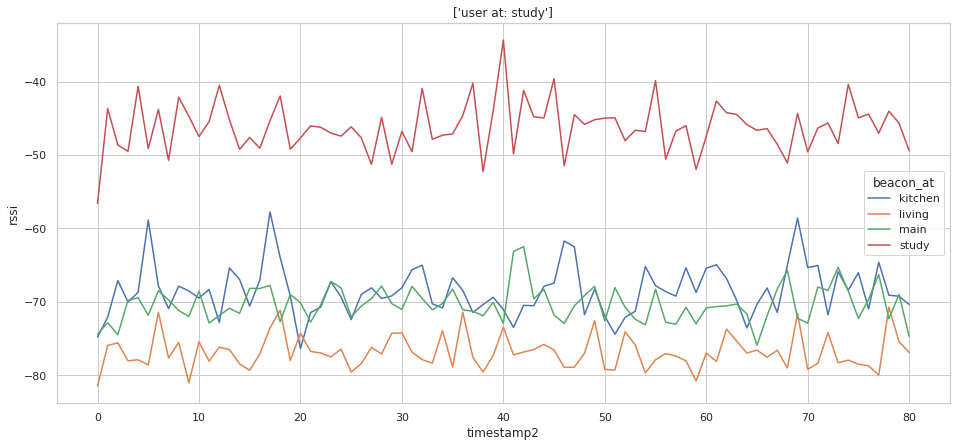

In [46]:
tmp = train_df_or[(train_df_or['experiment']==3) & (train_df_or['user_at']=='study')].groupby(['user_at', 'beacon_at', 'timestamp2'])['rssi'].max().reset_index()
plotSignals(tmp)

As we can see in most of these random experiments, there is a beacon that is more powerful than others and thus we could be able to predict the location of the user.

# Exporting file into drive

In [47]:
train_df_or.to_csv( "/content/drive/MyDrive/Research/IBM Advanced Data Science/sim_train_DF.csv", index=False, encoding='utf-8-sig')